In [1]:
import pandas as pd 
import numpy as np 


# 3D Data Creation 

In [2]:
np.random.seed(25)

mean_vec1=np.array([0,0,0]) #mean is kept to zero
cov_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]]) #taking identity matrix to make LI
class1_sample=np.random.multivariate_normal(mean_vec1,cov_mat1,20) #creating dataset of 20 rows
df1=pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3']) #creating dataframe using these data
df1['target']=1    #taking new column with value 1

#similarly we will create another dataset with target 0
mean_vec2=np.array([1,1,1])
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample=np.random.multivariate_normal(mean_vec2,cov_mat2,20)
df2=pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])
df2['target']=0

df=pd.concat([df1,df2],ignore_index=True)

df=df.sample(40)

df.head()


,feature1,feature2,feature3,target
25,0.032745,1.491996,0.449143,0
15,-0.502952,-0.225752,-0.565538,1
22,1.471998,1.577862,1.505407,0
29,0.215246,2.046145,0.354216,0
37,1.232724,1.671954,-0.346282,0


# 3D Data Plotting

In [3]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [6]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"


fig = px.scatter_3d(df,
                    x='feature1',
                    y='feature2',
                    z='feature3',
                    color=df['target'].astype(str))

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()


# Applying STEPS OF PCA


In [7]:
#Step-1: Apply Standard Scaling 

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df.iloc[:,0:3]=scaler.fit_transform(df.iloc[:,0:3])



In [11]:
#Step-2: Finding Covariance Matrix 

cov_matrix=np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])

cov_matrix

array([[ 1.02564103, -0.09920711,  0.32986794],
       [-0.09920711,  1.02564103, -0.14234016],
       [ 0.32986794, -0.14234016,  1.02564103]])

In [13]:
#Step-3: Finding Eigenvalues and Eigenvectors 

eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

eigen_values, eigen_vectors 

#we get three eigen values and corresponding three eigenvectors (each row represent a vector(point(x,y,z)))

(array([1.42820514, 0.6925552 , 0.95616273]),
 array([[-0.63900997,  0.68383966,  0.35217833],
        [ 0.39157354, -0.10488463,  0.91414954],
        [-0.6620698 , -0.72205438,  0.2007512 ]]))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


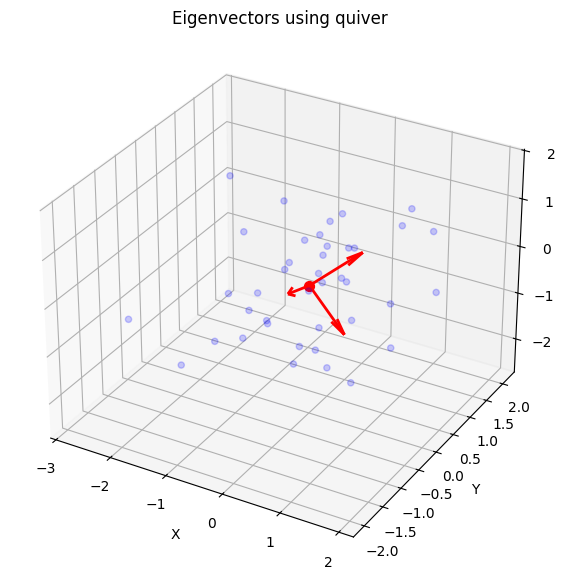

In [15]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# plot data points
ax.scatter(df['feature1'], df['feature2'], df['feature3'], color='blue', alpha=0.2)

# plot mean
mean_x = df['feature1'].mean()
mean_y = df['feature2'].mean()
mean_z = df['feature3'].mean()
ax.scatter([mean_x], [mean_y], [mean_z], color='red', s=50)

# plot eigenvectors
for v in eigen_vectors.T:
    ax.quiver(mean_x, mean_y, mean_z, v[0], v[1], v[2],
              length=1.0, normalize=True, color='r', linewidth=2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Eigenvectors using quiver")
plt.show()


In [16]:
#Step-4: Taking Top Two EigenVectors as PC

pc=eigen_vectors[0:2] 
pc

array([[-0.63900997,  0.68383966,  0.35217833],
       [ 0.39157354, -0.10488463,  0.91414954]])

In [17]:
#Step-5: Transformation of Data 

transformed_df=np.dot(df.iloc[:,0:3],pc.T)  #  ( 40,3).(3,2)--(40,2)--2D

In [18]:
transformed_df

array([[ 0.77446967, -0.2510427 ],
       [-0.21343632, -1.18323097],
       [ 0.32300824,  1.18684492],
       [ 0.94549125, -0.31519441],
       [-0.10440864, -0.52382748],
       [ 3.16017045, -1.11959267],
       [-1.28841922, -0.54011693],
       [-0.41330764,  1.32197078],
       [-0.03608854, -1.26415369],
       [ 0.38700254, -2.88675151],
       [ 1.15383504,  0.85799113],
       [-2.19788944,  0.43886048],
       [-0.18923489, -0.46480252],
       [ 0.51530994, -2.70153234],
       [ 0.67290683,  0.89475077],
       [ 0.76058553,  0.03529119],
       [-0.6133406 , -0.05889263],
       [-0.06496302, -0.06563922],
       [ 1.24337489,  0.36889968],
       [ 0.35541864,  1.14186857],
       [ 0.33581925,  0.56547416],
       [-0.99422036, -0.50738965],
       [-0.08176448,  0.63439387],
       [-0.83884294,  0.88270006],
       [-0.62330595,  1.11121757],
       [-0.82269185,  1.11712111],
       [ 0.5987152 ,  0.4769396 ],
       [-1.01198887,  0.43604541],
       [ 0.14981023,

In [20]:
new_df=pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target']=df['target'].values

new_df.head()

,PC1,PC2,target
0,0.774470,-0.251043,0
1,-0.213436,-1.183231,1
2,0.323008,1.186845,0
3,0.945491,-0.315194,0
4,-0.104409,-0.523827,0


In [21]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()